# 🐨COSADAMA Intermediate Data Science : Machine Learning

## About EDA   

* 순서   
1. 데이터를 import
2. 데이터 전처리 (preprocessing)   
     2-1) 데이터 모양 확인   
     2-2) 데이터 타입을 확인    
     2-3) 데이터의 Null 값을 체크   
3. 종속변수의 분포를 살펴본다 = 정답값(label) 보기   
    ex) 당뇨병에서 Outcome 변수   
4. 독립변수 - 명목형 변수의 분포 
5. 독립변수 - 수치형 변수의 분포  
6. 수치형, 명목형 변수간의 관계

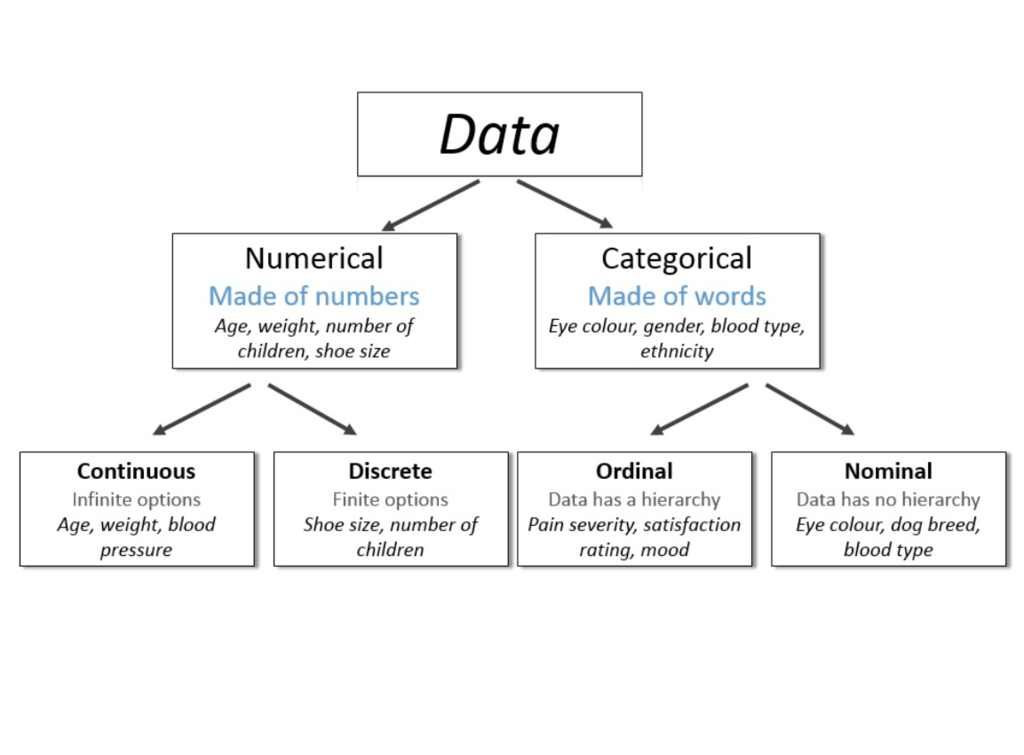출처 ; Types of Data Diagram | Quizlet

* Categorical: Survived, Sex, and Embarked. Ordinal: Pclass   
* Continous: Age, Fare. Discrete: SibSp, Parch

**What is the distribution of numerical feature values across the samples?**

This helps us determine, among other early insights, how representative is the training dataset of the actual problem domain.

-Total samples are 891 or 40% of the actual number of passengers on board the Titanic (2,224).   
-Survived is a categorical feature with 0 or 1 values.   
-Around 38% samples survived representative of the actual survival rate at 32%.   
-Most passengers (> 75%) did not travel with parents or children.   
-Nearly 30% of the passengers had siblings and/or spouse aboard.   
-Fares varied significantly with few passengers (<1%) paying as high as $512.   
-Few elderly passengers (<1%) within age range 65-80.

**What is the distribution of categorical features?**

-Names are unique across the dataset (count=unique=891)   
-Sex variable as two possible values with 65% male (top=male, freq=577/count=891).   
-Cabin values have several dupicates across samples. Alternatively several passengers shared a cabin.   
-Embarked takes three possible values. S port used by most passengers (top=S)   
-Ticket feature has high ratio (22%) of duplicate values (unique=681).   

**Assumtions based on data analysis**

Correlating.

-  correlations with modelled correlations later in the project.

Completing.

- complete Age feature as it is definitely correlated to survival.
- complete the Embarked feature as it may also correlate with survival or another important feature.   

Correcting.

Ticket feature , Cabin feature , PassengerId, Name feature dropped.   

Creating.

- create a new feature called Family based on Parch and SibSp to get total count of family members on board.   
- engineer the Name feature to extract Title as a new feature.
- create new feature for Age bands. This turns a continous numerical feature into an ordinal categorical feature. 수치형 변수가 잘게 나뉘어지면 그 데이터에 overfit 현상이 발생하기 쉬움 -> 연속 수치 데이터는 범주형으로 만들어준다.
- create a Fare range feature if it helps our analysis.   

Classifying.

- Women (Sex=female) were more likely to have survived.
- Children (Age<?) were more likely to have survived.
- The upper-class passengers (Pclass=1) were more likely to have survived.

In [56]:
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [83]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

## 데이터 전처리

In [84]:
#계산을 위해 성별을 0과 1로 바꿔준다
sex_mapping = {'male':0, 'female':1}
train_df['Sex'] = train_df['Sex'].map(sex_mapping)
test_df['Sex'] = test_df['Sex'].map(sex_mapping)
#train_df.head()

In [85]:
#이름에서 Mr, Mrs, Miss 추출
train_df['Title'] = train_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test_df['Title'] = test_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
#train_df.head()

In [86]:
#Mr, Mrs, Miss만 남기고 나머지 이름들은 3으로 처리한다
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
train_df['Title'] = train_df['Title'].map(title_mapping)
test_df['Title'] = test_df['Title'].map(title_mapping)
    
    
#train_df.head()

In [87]:
#가족 수를 합쳐서 새로운 column Family를 만들어준다
train_df['Family'] = train_df['SibSp'] + train_df['Parch']
#train_df.head()

In [88]:
test_df['Family'] = test_df['SibSp'] + test_df['Parch']
#test_df.head()

https://www.kaggle.com/startupsci/titanic-data-science-solutions

### 독립변수 분포 살펴보기 - 명목형 변수와 Survived의 관계

In [28]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [29]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
1,1,0.742038
0,0,0.188908


In [30]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [31]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


### 독립변수 분포 살펴보기 - 수치형 변수와 survived의 관계   


* Infants (Age <=4) had high survival rate.
* Oldest passengers (Age = 80) survived.
* Large number of 15-25 year olds did not survive.
* Most passengers are in 15-35 age range.

Use seaborn.FacetGrid - Multi-plot grid for plotting conditional relationships.

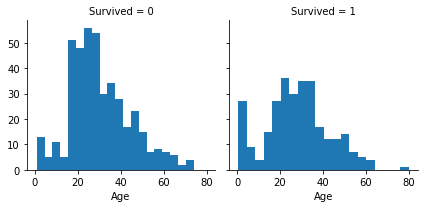

In [32]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

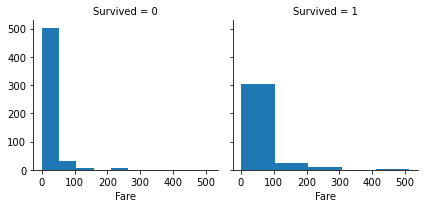

In [10]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Fare', bins=5)

C:\Users\Owner\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


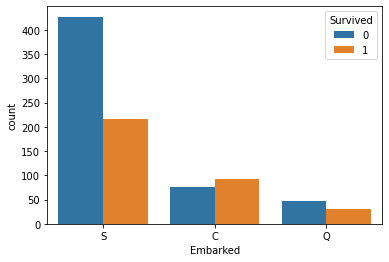

In [18]:
ax = sns.countplot("Embarked", hue = 'Survived',data=train_df)

### 수치형 변수와 순서형 자료(순위의 개념이 있는) 관계

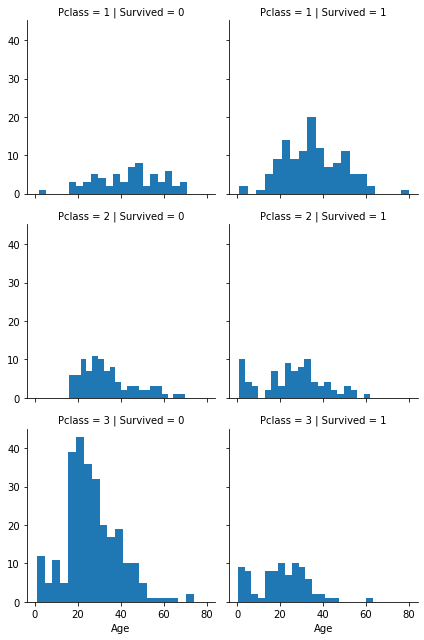

In [33]:
g = sns.FacetGrid(train_df, col='Survived', row='Pclass')
g.map(plt.hist, 'Age', bins=20)

In [89]:
train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)

In [90]:
train_df = train_df.drop(['SibSp', 'Parch'], axis=1)
test_df = test_df.drop(['SibSp', 'Parch'], axis=1)

In [91]:
train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)

In [12]:
#test_df.head()

## 수치 -> 명목형

In [92]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port # mode 가장 많이 나온 값을 알려줌

'S'

In [93]:
train_df['Embarked'] = train_df['Embarked'].fillna(freq_port)
train_df['Embarked'] = train_df['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
test_df['Embarked'] = test_df['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [94]:
#train_df.describe()

In [95]:
train_df['Family'] = train_df['Family'].map({0:0, 1:1, 2:1, 3:1,4:1,5:1,6:1,7:1,8:1,9:1,10:1})

In [96]:
test_df['Family'] = test_df['Family'].map({0:0, 1:1, 2:1, 3:1,4:1,5:1,6:1,7:1,8:1,9:1,10:1})

In [97]:
#계산을 위해 object값을 int로 변형한다
train_df['Survived'] = train_df['Survived'].astype(int)
train_df['Pclass'] = train_df['Pclass'].astype(int)
train_df['Sex'] = train_df['Sex'].astype(int)
train_df['Family'] = train_df['Family'].astype(int)


test_df['Pclass'] = test_df['Pclass'].astype(int)
test_df['Sex'] = test_df['Sex'].astype(int)
test_df['Family'] = test_df['Family'].astype(int)


### 결측치 처리 1) 평균값 2) 중앙값

In [19]:
test_df.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
Fare            1
Embarked        0
Title           0
Family          0
dtype: int64

In [382]:
#test_df.describe()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,Family
count,418.000000,418.000000,418.000000,332.000000,417.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,0.363636,30.272590,35.627188,0.464115,0.732057,0.394737
std,120.810458,0.841838,0.481622,14.181209,55.907576,0.685516,0.972019,0.489380
min,892.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,0.000000,21.000000,7.895800,0.000000,0.000000,0.000000
50%,1100.500000,3.000000,0.000000,27.000000,14.454200,0.000000,0.000000,0.000000
75%,1204.750000,3.000000,1.000000,39.000000,31.500000,1.000000,1.000000,1.000000
max,1309.000000,3.000000,1.000000,76.000000,512.329200,2.000000,3.000000,1.000000


In [383]:
#train_df.describe()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Family
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.699118,32.204208,0.361392,0.710438,0.397306
std,257.353842,0.486592,0.836071,0.477990,14.526497,49.693429,0.635673,0.968778,0.489615
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,20.125000,7.910400,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,0.000000,28.000000,14.454200,0.000000,0.000000,0.000000
75%,668.500000,1.000000,3.000000,1.000000,38.000000,31.000000,1.000000,1.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,512.329200,2.000000,3.000000,1.000000


In [384]:
test_df.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
Fare            1
Embarked        0
Title           0
Family          0
dtype: int64

In [98]:
train_df["Age"].fillna(train_df.groupby("Title")["Age"].transform("median"), inplace=True)
train_df.groupby("Title")["Age"].transform("median")

0      30.0
1      35.0
2      21.0
3      35.0
4      30.0
       ... 
886     9.0
887    21.0
888    21.0
889    30.0
890    30.0
Name: Age, Length: 891, dtype: float64

In [99]:
test_df["Age"].fillna(test_df.groupby("Title")["Age"].transform("median"), inplace=True)
test_df.groupby("Title")["Age"].transform("median")

0      28.5
1      36.5
2      28.5
3      28.5
4      36.5
       ... 
413    28.5
414    10.0
415    28.5
416    28.5
417    10.0
Name: Age, Length: 418, dtype: float64

In [100]:
test_df['Fare'].median()

14.4542

In [101]:
test_df['Fare'] = test_df['Fare'].fillna(14.4542)

In [26]:
print(test_df.isnull().sum())
train_df.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
Title          0
Family         0
dtype: int64


PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
Title          0
Family         0
dtype: int64

In [29]:
train_df.to_csv('titanic_feature.csv')

In [48]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Family
0,1,0,3,0,22.0,7.2500,0,0,1
1,2,1,1,1,38.0,71.2833,1,2,1
2,3,1,3,1,26.0,7.9250,0,1,0
3,4,1,1,1,35.0,53.1000,0,2,1
4,5,0,3,0,35.0,8.0500,0,0,0


### 나이를 세 범주로 나눠주기

In [102]:
#train_df=pd.read_csv('titanic_test_feature.csv', index_col=0)
train_df['Age_low'] = train_df['Age'] < 10
train_df['Age_middle'] = (train_df['Age'] >= 10) & (train_df['Age']<=60)
train_df['Age_high'] = train_df['Age'] > 60
train_df[['Age', 'Age_low', 'Age_middle', 'Age_high']].head()

,Age,Age_low,Age_middle,Age_high
0,22.0,False,True,False
1,38.0,False,True,False
2,26.0,False,True,False
3,35.0,False,True,False
4,35.0,False,True,False


In [103]:
test_df['Age_low'] = test_df['Age'] < 10
test_df['Age_middle'] = (test_df['Age'] >= 10) & (test_df['Age']<=60)
test_df['Age_high'] = test_df['Age'] > 60
test_df[['Age', 'Age_low', 'Age_middle', 'Age_high']].head()

,Age,Age_low,Age_middle,Age_high
0,34.5,False,True,False
1,47.0,False,True,False
2,62.0,False,False,True
3,27.0,False,True,False
4,22.0,False,True,False


In [190]:
train_df_0= train_df[train_df['Survived']==0]
train_df_1=train_df[train_df['Survived']==1]

In [104]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Family,Age_low,Age_middle,Age_high
0,1,0,3,0,22.0,7.2500,0,0,1,False,True,False
1,2,1,1,1,38.0,71.2833,1,2,1,False,True,False
2,3,1,3,1,26.0,7.9250,0,1,0,False,True,False
3,4,1,1,1,35.0,53.1000,0,2,1,False,True,False
4,5,0,3,0,35.0,8.0500,0,0,0,False,True,False


## Fare

### 이상치 조정

#### train

C:\Users\Owner\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Fare'>

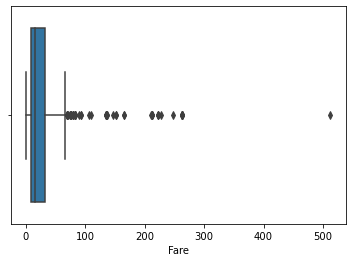

In [18]:
sns.boxplot(train_df['Fare'])

In [19]:
IQR3=train_df['Fare'].quantile(0.75) # 중앙값이 기본, 분위수 구하기
IQR1=train_df['Fare'].quantile(0.25)
IQR=IQR3-IQR1
IQR

23.576075

In [20]:
OUT = IQR3 + (1.5* IQR) # 상자 수염그림에서 보는 이상치 값
OUT

66.8359875

In [223]:
train_df[train_df['Fare'] > 100].shape

(53, 12)

In [224]:
train_df[train_df['Fare'] > 200].shape

(20, 12)

C:\Users\Owner\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Fare'>

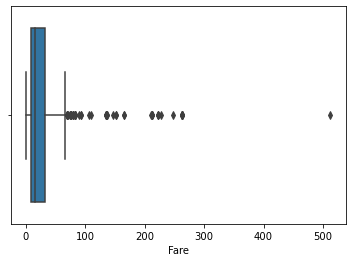

In [226]:
sns.boxplot(test_df['Fare'])

In [227]:
IQR3=test_df['Fare'].quantile(0.75) # 중앙값이 기본, 분위수 구하기
IQR1=test_df['Fare'].quantile(0.25)
IQR=IQR3-IQR1
IQR

23.576075

In [228]:
OUT = IQR3 + (1.5* IQR) # 상자 수염그림에서 보는 이상치 값
OUT

66.8359875

In [230]:
test_df[test_df['Fare'] > 100].shape

(31, 11)

In [414]:
test_df[test_df['Fare'] > 200].shape

(18, 11)

In [105]:
train_df = train_df[train_df['Fare'] < 200]
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Family,Age_low,Age_middle,Age_high
0,1,0,3,0,22.0,7.2500,0,0,1,False,True,False
1,2,1,1,1,38.0,71.2833,1,2,1,False,True,False
2,3,1,3,1,26.0,7.9250,0,1,0,False,True,False
3,4,1,1,1,35.0,53.1000,0,2,1,False,True,False
4,5,0,3,0,35.0,8.0500,0,0,0,False,True,False


In [106]:
tmp = test_df[test_df['Fare'] >= 200]
erase_id= tmp['PassengerId'].tolist()
erase_id

[916,
 945,
 951,
 956,
 961,
 966,
 967,
 973,
 1006,
 1034,
 1048,
 1076,
 1094,
 1110,
 1216,
 1235,
 1267,
 1299]

In [107]:
test_df = test_df[test_df['Fare'] < 200]
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,Family,Age_low,Age_middle,Age_high
0,892,3,0,34.5,7.8292,2,0,0,False,True,False
1,893,3,1,47.0,7.0000,0,2,1,False,True,False
2,894,2,0,62.0,9.6875,2,0,0,False,False,True
3,895,3,0,27.0,8.6625,0,0,0,False,True,False
4,896,3,1,22.0,12.2875,0,2,1,False,True,False


### Fare log

C:\Users\Owner\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Owner\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

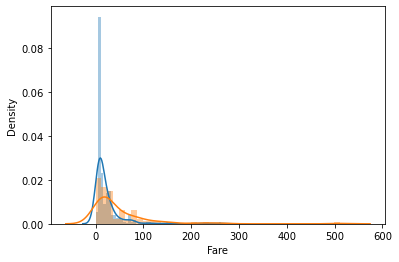

In [194]:
sns.distplot(train_df_0['Fare'])
sns.distplot(train_df_1['Fare'])

C:\Users\Owner\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare_log', ylabel='Density'>

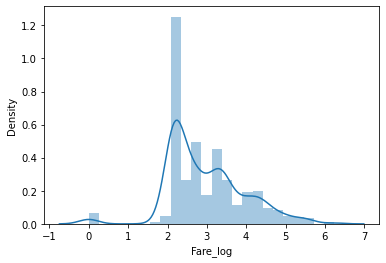

In [52]:
train_df['Fare_log']=np.log(train_df['Fare'] + 1) # -무한대 방지
sns.distplot(train_df['Fare_log'])

C:\Users\Owner\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare_log', ylabel='Density'>

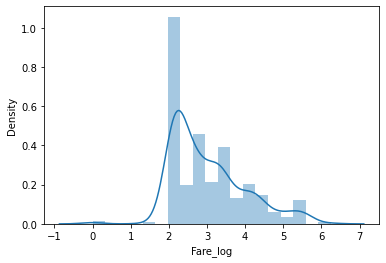

In [53]:
test_df['Fare_log']=np.log(test_df['Fare'] + 1) # -무한대 방지
sns.distplot(test_df['Fare_log'])

## Machine Learning

### 학습, 예측에 사용할 컬럼

In [108]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked',
       'Title', 'Family', 'Age_low', 'Age_middle', 'Age_high'],
      dtype='object')

In [109]:
feature_names = list(train_df.columns)
feature_names.remove('Survived')
#feature_names.remove('Fare')
feature_names.remove('PassengerId')

In [110]:
feature_names.remove('Age')

In [111]:
feature_names

['Pclass',
 'Sex',
 'Fare',
 'Embarked',
 'Title',
 'Family',
 'Age_low',
 'Age_middle',
 'Age_high']

#### 정답이자 예측해야할 값

In [112]:
X_train = train_df[feature_names]

In [113]:
print(X_train.shape)
X_train.head()

(871, 9)


,Pclass,Sex,Fare,Embarked,Title,Family,Age_low,Age_middle,Age_high
0,3,0,7.2500,0,0,1,False,True,False
1,1,1,71.2833,1,2,1,False,True,False
2,3,1,7.9250,0,1,0,False,True,False
3,1,1,53.1000,0,2,1,False,True,False
4,3,0,8.0500,0,0,0,False,True,False


In [114]:
y_train = train_df['Survived']

In [115]:
y_train.head() # diabetes : 1 not : 0
print(y_train.shape) # 열의 개수가 같아야함

(871,)


#### 실전 문제 만들기

In [116]:
X_test = test_df[feature_names]
print(X_test.shape)
X_test.head()

(400, 9)


,Pclass,Sex,Fare,Embarked,Title,Family,Age_low,Age_middle,Age_high
0,3,0,7.8292,2,0,0,False,True,False
1,3,1,7.0000,0,2,1,False,True,False
2,2,0,9.6875,2,0,0,False,False,True
3,3,0,8.6625,0,0,0,False,True,False
4,3,1,12.2875,0,2,1,False,True,False


In [118]:
y_answer = pd.read_csv('gender_submission.csv')
#print(y_answer.shape)
for x in erase_id:
    y_answer_cond = y_answer[y_answer['PassengerId'] == x].index
    y_answer = y_answer.drop(y_answer_cond)
#y_answer
#print(y_answer.shape)
#y_answer.head()

In [119]:
y_test = y_answer['Survived']
y_test

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 400, dtype: int64

### 머신러닝 알고리즘 가져오기

In [120]:
from sklearn.tree import DecisionTreeClassifier # 당뇨병인지 아닌지 분류하기 때문에 classify

model = DecisionTreeClassifier() # 알고리즘이 이미 구현된 것을 사용 - 요리할 때 완성된 조리도구를 사용하는 것
model # 다양한 옵션

DecisionTreeClassifier()

### 학습(훈련)

In [121]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

### 예측

In [122]:
y_predict = model.predict(X_test) # 정답을 넣지 않음 다 풀고 채점해야지
y_predict[:5]

array([0, 1, 0, 0, 1])

### 트리 알고리즘 분석

[Text(176.69601200686105, 211.4, 'Title <= 0.5\ngini = 0.47\nsamples = 871\nvalue = [543, 328]'),
 Text(94.07277015437393, 199.32, 'Fare <= 26.269\ngini = 0.262\nsamples = 509\nvalue = [430, 79]'),
 Text(58.790994854202395, 187.24, 'Fare <= 7.91\ngini = 0.18\nsamples = 390\nvalue = [351, 39]'),
 Text(44.50600343053173, 175.16, 'Fare <= 7.865\ngini = 0.144\nsamples = 179\nvalue = [165, 14]'),
 Text(33.8819897084048, 163.07999999999998, 'Fare <= 7.763\ngini = 0.168\nsamples = 140\nvalue = [127, 13]'),
 Text(19.525214408233275, 151.0, 'Fare <= 7.24\ngini = 0.135\nsamples = 110\nvalue = [102, 8]'),
 Text(13.782504288164665, 138.92000000000002, 'Fare <= 7.133\ngini = 0.17\nsamples = 64\nvalue = [58, 6]'),
 Text(9.188336192109777, 126.84, 'Fare <= 7.01\ngini = 0.095\nsamples = 40\nvalue = [38, 2]'),
 Text(6.891252144082332, 114.75999999999999, 'Fare <= 6.962\ngini = 0.142\nsamples = 26\nvalue = [24, 2]'),
 Text(4.594168096054888, 102.67999999999999, 'Pclass <= 2.5\ngini = 0.08\nsamples = 24\

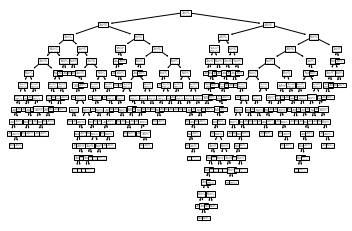

In [123]:
from sklearn.tree import plot_tree
#plot_tree?
plot_tree(
    model,
    feature_names=feature_names,)

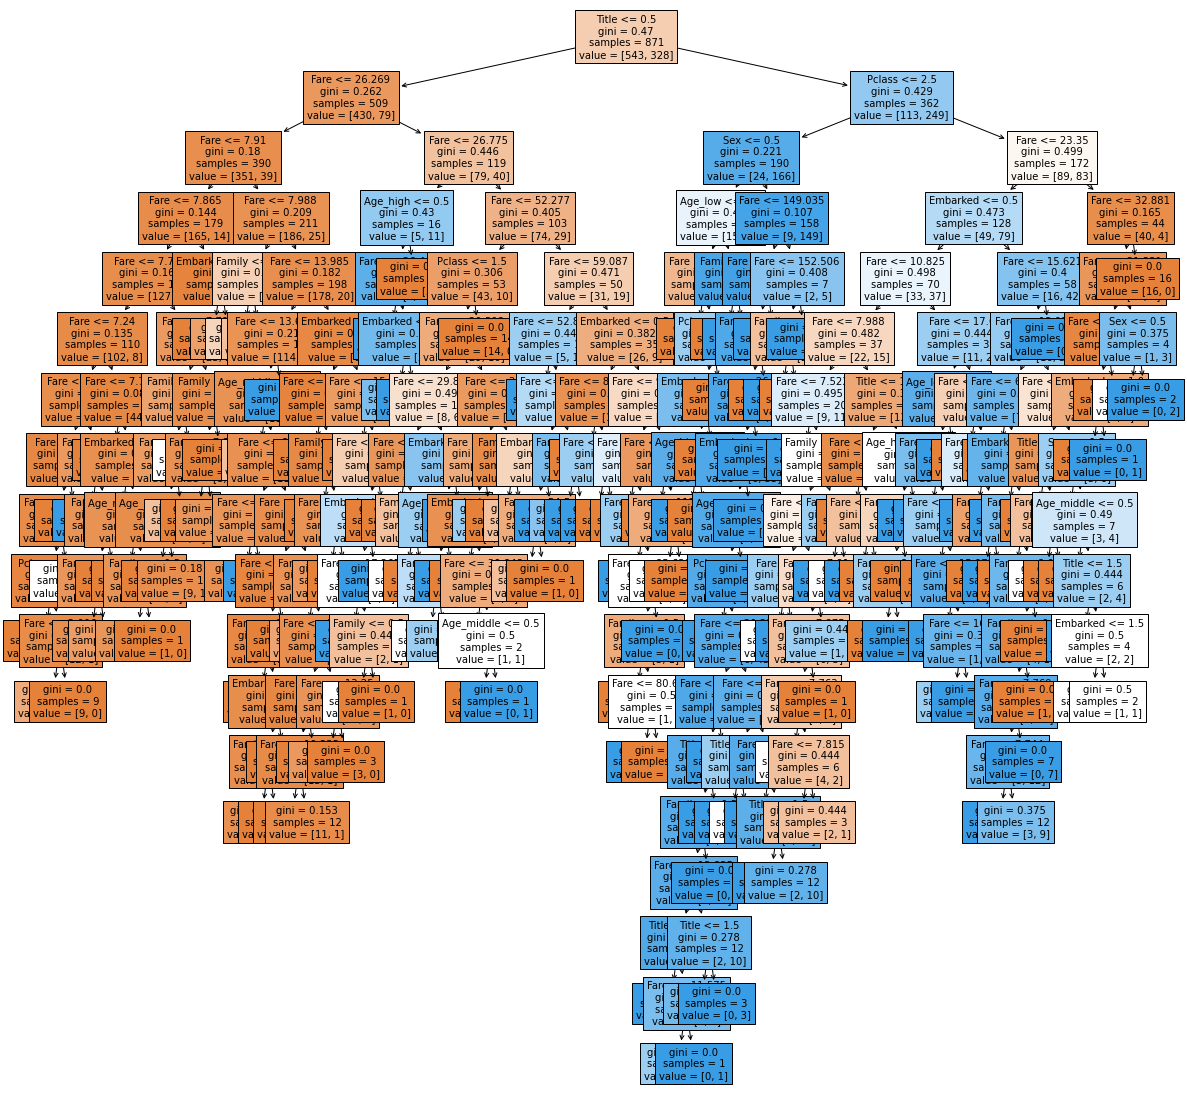

In [124]:
plt.figure(figsize=(20,20))
tree = plot_tree(
    model,
    feature_names=feature_names, filled=True, fontsize=10)

In [125]:
# 중요도 분석
model.feature_importances_

array([0.09497145, 0.03185134, 0.3822186 , 0.03329005, 0.3889932 ,
       0.02273797, 0.02005658, 0.00672683, 0.01915398])

<AxesSubplot:>

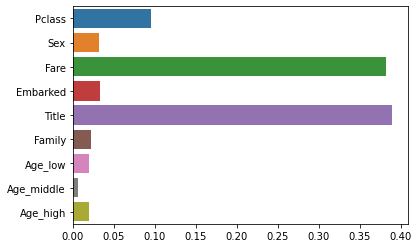

In [126]:
sns.barplot(x=model.feature_importances_, y=feature_names)

### 정확도 측정

In [458]:
#y_predict

In [127]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict) * 100

83.75

나이 그대로 넣고 돌림 = 76.555   
나이 쪼개고 돌림 = 84.688   
요금에 로그 씌움 = 85.167   
로그 빼고 요금 이상치 제거 = 84.75

In [460]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Family,Age_low,Age_middle,Age_high
0,1,0,3,0,22.0,7.2500,0,0,1,False,True,False
1,2,1,1,1,38.0,71.2833,1,2,1,False,True,False
2,3,1,3,1,26.0,7.9250,0,1,0,False,True,False
3,4,1,1,1,35.0,53.1000,0,2,1,False,True,False
4,5,0,3,0,35.0,8.0500,0,0,0,False,True,False


In [461]:
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,Family,Age_low,Age_middle,Age_high
0,892,3,0,34.5,7.8292,2,0,0,False,True,False
1,893,3,1,47.0,7.0000,0,2,1,False,True,False
2,894,2,0,62.0,9.6875,2,0,0,False,False,True
3,895,3,0,27.0,8.6625,0,0,0,False,True,False
4,896,3,1,22.0,12.2875,0,2,1,False,True,False
